<a href="https://colab.research.google.com/github/bryandelgado99/Fundamentos-de-IA/blob/main/Deber_4__Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deber 4 -  Deep Learning

Para ello, se utiliza el conjunto de datos Fashion MNIST, el cual es un conjunto de imágenes que representa prendas de ropa en escala de grises.
Fashion MNIST consta de 60,000 imágenes. Cada imagen tiene un tamaño de 28x28 píxeles y pertenece a una de las 10 categorías de prendas de vestir.

Estas categorías incluyen:

- Camiseta/top
- Pantalón
- Suéter
- Vestido
- Abrigo
- Sandalia
- Camisa
- Zapatilla deportiva
- Bolso
- Botín

In [1]:
# 0. Importamos las librerias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

(60000, 28, 28)

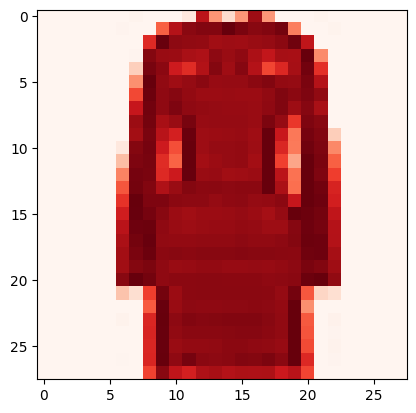

In [21]:
# 1. Cargamos los datos  de entrenamiento y pruebas, además del dataset de datos
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

'''Mostramos la imagen de datos'''
plt.imshow(x_train[500], cmap='Reds')

x_train.shape

## Arquitectura de la red neuronal convulcional

In [22]:
# 2. Preparamos los datos, conocemos el tamaño de datos y transormamos a binario
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# 3. Combiamos la forma de datos en escala de grises y su tamaño de pixeles 28op * 28p
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [23]:
# 3. Definimos las capas de esta red, siendo el mecanismo princpial de análisis de datos
'''A. Capa Convulcional: Incluye filtros, kernel, función de activación y forma de entrada'''
convulcional_ly = Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1))

'''B. Capa de Agrupamiento: Incluye cada región de 2x2 pixeles de entrada, se reducen a uno solo'''
agrupamiento_ly = MaxPooling2D(pool_size=(2,2))

'''C. Capa de Aplanamiento'''
aplanamiento_ly = Flatten()

'''D. Capas ocultas: Incluyen los números de neuronas componentes de estoss elementos'''
ocultas_ly = Dense(units=80, activation="relu")

'''E. Capa de salida'''
salida_ly = Dense(units=10, activation="softmax")

# 3.1. Definimos el modelo
modelo = keras.Sequential([convulcional_ly, agrupamiento_ly, aplanamiento_ly, ocultas_ly, salida_ly])

## Agrupación de datos, categorización y entrenamiento del modelo

In [24]:
# 4. Compilamos el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])

# 5. Pasamos a categorización los datos, con 10 salidas
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 6. Entrenamos el modelo
modelo.fit(x_train,y_train,batch_size=145, epochs=5)

Epoch 1/5
414/414 [==============================] - 44s 103ms/step - loss: 0.4544 - accuracy: 0.8416
Epoch 2/5
414/414 [==============================] - 43s 104ms/step - loss: 0.2967 - accuracy: 0.8943
Epoch 3/5
414/414 [==============================] - 42s 102ms/step - loss: 0.2580 - accuracy: 0.9073
Epoch 4/5
414/414 [==============================] - 42s 102ms/step - loss: 0.2279 - accuracy: 0.9181
Epoch 5/5
414/414 [==============================] - 43s 103ms/step - loss: 0.2056 - accuracy: 0.9250


## Evaluación del modelo

In [25]:
# 7. Evaluamos modelo con los datos de prueba
func_perdida = modelo.evaluate(x_test,y_test)
print("La función de perdida es: ",func_perdida[0])
print("La precision es: ",func_perdida[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2535 - accuracy: 0.9084
La función de perdida es:  0.2535397708415985
La precision es:  0.9083999991416931


## Lectura de imagenes con el modelo evaluado

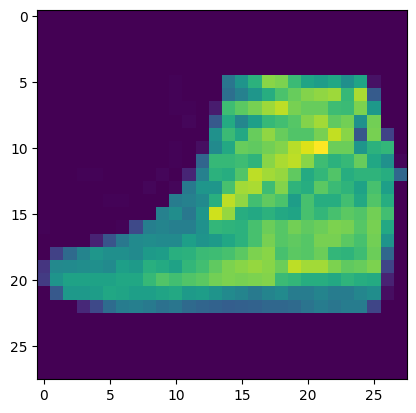

In [12]:
# 8. Leemos el modelo para verificar la eficiencia
imagen=x_test[250]
plt.imshow(imagen)

### Canales de color y dimensiones con Numpy

In [13]:
# 9. Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

# 10. Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

### Predicción de elementos mediante le modelo

In [14]:
# 11. Realizamos la predicción y la imprimimos
prediccion= modelo.predict(imagen)
prediccion_categoria= np.argmax(prediccion[0])
print('La imagen se clasifica como:',prediccion_categoria)

1/1 [==============================] - 0s 67ms/step
La imagen se clasifica como: 9


## Realización de predicciones

Se realizarán las predicciones de nuevas categorias, mediante los datos obtenidos en el modelo. Estas serán para las siguientes categorías:  
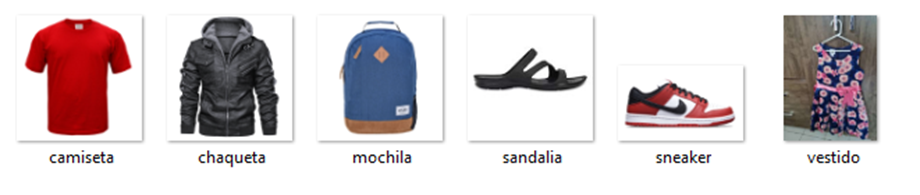


1/1 [==============================] - 0s 24ms/step
La imagen se clasifica como: 9


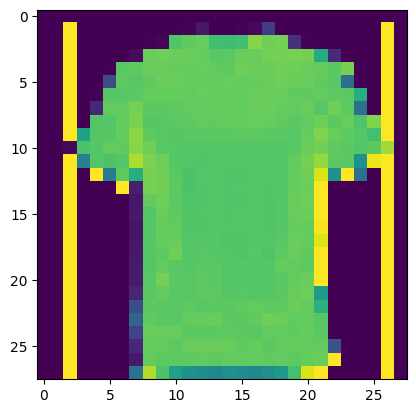

In [32]:
# Predicción 1:

# Leemos la imagen con CV2
imagen = cv.imread('/content/camiseta.png')

# Realizamos transformaciones de datos y procesamos la imagen
imagen = cv.GaussianBlur(imagen, (3,3), 0) #Filtro de desenfoque
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY) #Cambiamos color a escala de grises
imagen = cv.resize(imagen, (28,28), interpolation=cv.INTER_NEAREST) #Redimensionamiento de imagen
imagen = cv.bitwise_not(imagen) #Aplicación de inversión de color
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

prediccion_1 = modelo.predict(imagen)
prediccion_1__categoria = np.argmax(prediccion_1[0])
print('La imagen se clasifica como:',prediccion_1__categoria+1)

1/1 [==============================] - 0s 31ms/step
La imagen se clasifica como: 6


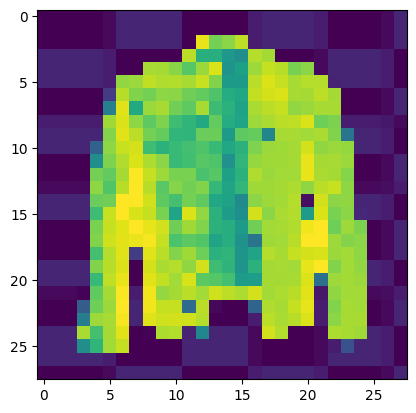

In [27]:
# Predicción 2:

# Leemos la imagen con CV2
imagen = cv.imread('/content/chaqueta.png')

# Realizamos transformaciones de datos y procesamos la imagen
imagen = cv.GaussianBlur(imagen, (3,3), 0) #Filtro de desenfoque
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY) #Cambiamos color a escala de grises
imagen = cv.resize(imagen, (28,28), interpolation=cv.INTER_NEAREST) #Redimensionamiento de imagen
imagen = cv.bitwise_not(imagen) #Aplicación de inversión de color
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

prediccion_1 = modelo.predict(imagen)
prediccion_1__categoria = np.argmax(prediccion_1[0])
print('La imagen se clasifica como:',prediccion_1__categoria+1)

1/1 [==============================] - 0s 23ms/step
La imagen se clasifica como: 4


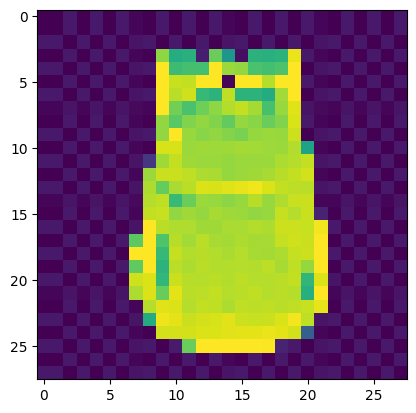

In [28]:
# Predicción 3:

# Leemos la imagen con CV2
imagen = cv.imread('/content/mochila_frontal.png')

# Realizamos transformaciones de datos y procesamos la imagen
imagen = cv.GaussianBlur(imagen, (3,3), 0) #Filtro de desenfoque
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY) #Cambiamos color a escala de grises
imagen = cv.resize(imagen, (28,28), interpolation=cv.INTER_NEAREST) #Redimensionamiento de imagen
imagen = cv.bitwise_not(imagen) #Aplicación de inversión de color
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

prediccion_1 = modelo.predict(imagen)
prediccion_1__categoria = np.argmax(prediccion_1[0])
print('La imagen se clasifica como:',prediccion_1__categoria+1)

1/1 [==============================] - 0s 32ms/step
La imagen se clasifica como: 8


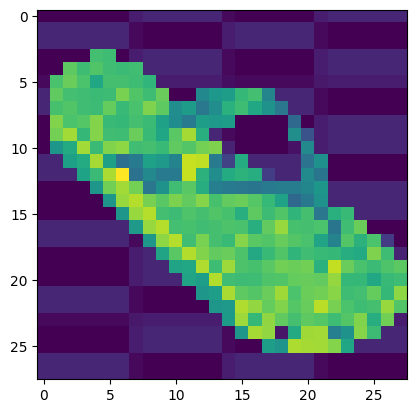

In [29]:
# Predicción 4:

# Leemos la imagen con CV2
imagen = cv.imread('/content/sandalia.png')

# Realizamos transformaciones de datos y procesamos la imagen
imagen = cv.GaussianBlur(imagen, (3,3), 0) #Filtro de desenfoque
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY) #Cambiamos color a escala de grises
imagen = cv.resize(imagen, (28,28), interpolation=cv.INTER_NEAREST) #Redimensionamiento de imagen
imagen = cv.bitwise_not(imagen) #Aplicación de inversión de color
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

prediccion_1 = modelo.predict(imagen)
prediccion_1__categoria = np.argmax(prediccion_1[0])
print('La imagen se clasifica como:',prediccion_1__categoria+1)

1/1 [==============================] - 0s 114ms/step
La imagen se clasifica como: 6


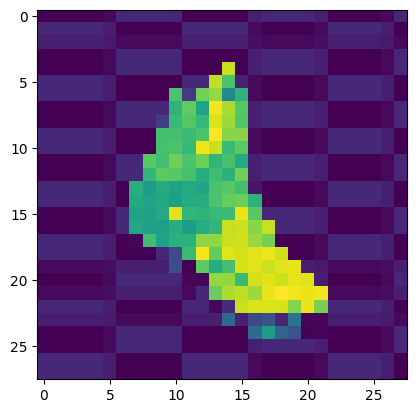

In [30]:
# Predicción 5:

# Leemos la imagen con CV2
imagen = cv.imread('/content/sneaker.png')

# Realizamos transformaciones de datos y procesamos la imagen
imagen = cv.GaussianBlur(imagen, (3,3), 0) #Filtro de desenfoque
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY) #Cambiamos color a escala de grises
imagen = cv.resize(imagen, (28,28), interpolation=cv.INTER_NEAREST) #Redimensionamiento de imagen
imagen = cv.bitwise_not(imagen) #Aplicación de inversión de color
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

prediccion_1 = modelo.predict(imagen)
prediccion_1__categoria = np.argmax(prediccion_1[0])
print('La imagen se clasifica como:',prediccion_1__categoria+1)

1/1 [==============================] - 0s 132ms/step
La imagen se clasifica como: 6


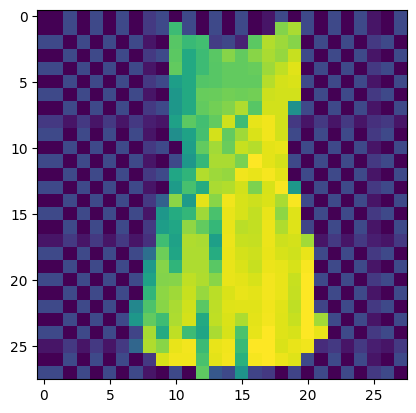

In [31]:
# Predicción 6:

# Leemos la imagen con CV2
imagen = cv.imread('/content/vestido.png')

# Realizamos transformaciones de datos y procesamos la imagen
imagen = cv.GaussianBlur(imagen, (3,3), 0) #Filtro de desenfoque
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY) #Cambiamos color a escala de grises
imagen = cv.resize(imagen, (28,28), interpolation=cv.INTER_NEAREST) #Redimensionamiento de imagen
imagen = cv.bitwise_not(imagen) #Aplicación de inversión de color
plt.imshow(imagen)

# Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

# Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

prediccion_1 = modelo.predict(imagen)
prediccion_1__categoria = np.argmax(prediccion_1[0])
print('La imagen se clasifica como:',prediccion_1__categoria+1)